In [2]:
import dcor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# References:
# Model-free feature screening for ultrahigh-dimensional data: screening threshold
# Measuring and testing independence by correlation of distances: DC
# Feature screening via distance correlation learning: feature selection

In [3]:
model_name = '1.iw.mullion.light.pittsburgh.train'
file_loc = './state_correlation_test/' + model_name + '.res.csv';
states_pd = pd.read_csv(file_loc, index_col = 0, skiprows = 3)


In [4]:
states_pd

,Environment,Environment.1,Environment.2,Environment.3,EMS,EMS.1,EMS.2,EMS.3,EMS.4,TEMPHWLOOP SUPPLY SIDE OUTLET,EMS.5
2002/1/1 0:10,1.200000,95.166667,0.0,0.0,19.0,20.913752,-0.542445,0,1,60.0,52.476351
2002/1/1 0:20,2.400000,95.333333,0.0,0.0,19.0,20.932212,-0.489243,0,1,60.0,61.207247
2002/1/1 0:30,3.600000,95.500000,0.0,0.0,19.0,21.116889,-0.451096,0,1,20.0,40.115366
2002/1/1 0:40,4.800000,95.666667,0.0,0.0,19.0,21.422490,-0.425595,0,1,20.0,31.435844
2002/1/1 0:50,6.000000,95.833333,0.0,0.0,19.0,21.618142,-0.411140,0,1,45.0,30.286868
2002/1/1 1:00,7.200000,96.000000,0.0,0.0,19.0,21.719205,-0.404408,0,1,45.0,36.521407
2002/1/1 1:10,7.200000,96.000000,0.0,0.0,19.0,21.764036,-0.380698,0,1,65.0,58.077958
2002/1/1 1:20,7.200000,96.000000,0.0,0.0,19.0,21.850159,-0.324887,0,1,65.0,67.147481
2002/1/1 1:30,7.200000,96.000000,0.0,0.0,19.0,22.056757,-0.289632,0,1,40.0,45.560973
2002/1/1 1:40,7.200000,96.000000,0.0,0.0,19.0,22.337158,-0.265830,0,1,40.0,36.080214


In [5]:
states_ay = states_pd.values
#states_ay[:,9] = states_ay[:,9]/200000
#states_ay[:,2] = states_ay[:,2]/300
#states_ay[:,1] = states_ay[:,1]/100
#states_ay[:,3] = states_ay[:,3]/1000
#states_ay = states_ay[:, [0,1,2,3,4,5,6,7,8,9]]

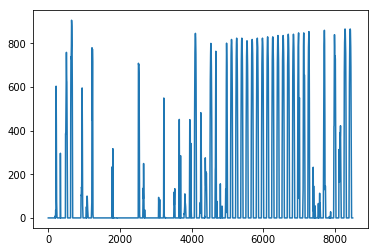

In [6]:
plt.plot(states_ay[:, 3])

In [7]:
def get_prcd_states_single(states_ay, time_back):
    states_x = states_ay[0:-time_back, :]
    states_y = states_ay[time_back:, :]
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [ ]:
single_dcors = [];
for time_i in range(1, 288):
    print(time_i)
    single_dcors.append(get_prcd_states_single(states_ay, time_i)[2].correlation_xy)

1
2
3
4
5
6


In [25]:
np.savetxt('./state_correlation_test/' + model_name + '.dcor.csv', single_dcors)

In [24]:
single_dcors

[0.9960940736329502,
 0.9876780762634071,
 0.9753492847459637,
 0.9591203796293744,
 0.9394017958539439,
 0.9166697464043633,
 0.8913524632096791,
 0.8638551332203489,
 0.8345205634066932,
 0.8037034545657891,
 0.7717009631073735,
 0.7388223189961001,
 0.7053161803598691,
 0.6713224827610258,
 0.6369579939092102,
 0.6023746886286065,
 0.5677033204439101,
 0.5330861887906361,
 0.4986256173537266,
 0.46447091382786654,
 0.43076095391616415,
 0.3976732150704987,
 0.3653662528843231,
 0.33405908089957237,
 0.30396691393772474,
 0.2753632409628688,
 0.24853120429333506,
 0.22388015430735708,
 0.20185710739931276,
 0.18305996540351038,
 0.16809415970822106,
 0.15759819705078448,
 0.1519310371822379,
 0.15113992180115957,
 0.15472570421283027,
 0.1619216922874642,
 0.17177525536020066,
 0.1834671510167625,
 0.19623112113040428,
 0.2095232858846793,
 0.2228802640276083,
 0.23595553098592215,
 0.24844958375668308,
 0.2602225858580322,
 0.27113349217830074,
 0.2811086836840368,
 0.29005443994292

In [142]:
def get_aux_states_single(states_ay):
    mean = np.mean(states_ay)
    std = np.std(states_ay)
    states_x = np.random.normal(mean, std, size = states_ay.shape);
    states_y = states_ay;
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [191]:
single_dcors

[0.996252628753445,
 0.9870716149259298,
 0.9733607178315145,
 0.9559530292728831,
 0.9356610040252185,
 0.9132860662977248,
 0.8894623866019101,
 0.8644395917425268,
 0.8384317447079863,
 0.8116439905343995,
 0.7842287145698006,
 0.7563166800102115,
 0.7280326059020734,
 0.6994724909491921,
 0.6706885668385972,
 0.6417080875562078,
 0.6125627212210325,
 0.5832651204262884,
 0.553844127560707,
 0.5243857120041462,
 0.49498899112003153,
 0.46572857053799616,
 0.4367387998075701,
 0.4081532070937671,
 0.3801021322244334,
 0.35269068651548485,
 0.32600473296678184,
 0.30016196801866774,
 0.27528866625618736,
 0.25155623448100217,
 0.22915198789464608,
 0.20832731176519287,
 0.18940621491767082,
 0.17275148394171358,
 0.1588278901829992,
 0.1481116101770661,
 0.14104876996359572,
 0.13791128778373524,
 0.13868189714040485,
 0.14301810247543326,
 0.1503567697052787,
 0.16001071086335242,
 0.1713410947756923,
 0.18375305920185622,
 0.19676755687184866,
 0.21001852590880882,
 0.22319461947850

In [197]:
def get_idx_with_thres(dcors, thres):
    idx = 1;
    for dcor in dcors:
        if dcor < thres:
            break;
        idx += 1;
    return idx;

In [207]:
get_idx_with_thres(single_dcors, 0.5)

35

In [158]:
def get_prcd_states_stack(states_ay, time_back):
    states_y = states_ay[time_back:, :];
    states_x = [];
    for line_i in range(states_ay.shape[0]):
        if (states_ay.shape[0] - line_i) >= (time_back + 1):
            states_x.append(states_ay[line_i: line_i + time_back].flatten().tolist());
    states_x = np.array(states_x);
    return (states_x, states_y, dcor.distance_stats(states_x, states_y))

In [160]:
stack_dcors = [];
for time_i in range(1, 144):
    stack_dcors.append(get_prcd_states_stack(states_ay, time_i)[2].correlation_xy)

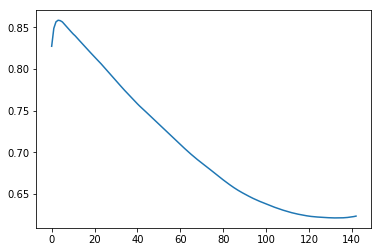

In [195]:
plt.plot(stack_dcors)

In [161]:
stats

Stats(covariance_xy=11907.01607774836, correlation_xy=0.8579947319025889, variance_x=18957.465013247333, variance_y=10159.126645923148)

In [133]:
print(y[0])

[1.80000000e+01 8.30000000e+01 0.00000000e+00 0.00000000e+00
 2.05781797e+01 2.12226612e+01 2.16485287e+01 2.11995969e+01
 2.16648828e+01 2.10401879e+01 2.03378237e+01 2.20062343e+01
 2.03243841e+01 2.19989913e+01 2.09989709e+01 2.11410706e+01
 2.03254045e+01 2.09024775e+01 2.04584599e+01 2.10396796e+01
 2.10433443e+01 1.98943007e+01 2.11819041e+01 2.05219664e+01
 2.09127554e+01 2.00200759e+01 1.94359421e+04 2.74373306e+01
 2.82398407e+01 2.82064900e+01 2.76770225e+01 2.78929448e+01
 2.82710704e+01 2.82830028e+01 2.81405238e+01 2.78934023e+01
 2.71488842e+01 2.77586112e+01 2.84344343e+01 2.89238214e+01
 2.85606338e+01 2.78010264e+01 2.84777223e+01 2.84509423e+01
 2.69096399e+01 2.82507418e+01 2.82107228e+01 2.77855292e+01
 2.83827043e+01 1.74373306e+01 1.89238214e+01 1.82398407e+01
 1.84509423e+01 1.82507418e+01 1.82064900e+01 1.83827043e+01
 1.78929448e+01 1.81405238e+01 1.71488842e+01 1.82710704e+01
 1.69096399e+01 1.85606338e+01 1.82830028e+01 1.78934023e+01
 1.84344343e+01 1.780102